<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import cross_decomposition
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

### 1. Load Data
Diabetes dataset is used for alternative regression models


In [2]:
# breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
diabetes = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\diabetes.csv")

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# check that y is a boolean
print(diabetes["Outcome"])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [5]:
# Create a dictionary with the variables we are looking at:
X = { "Glucose": diabetes.iloc[:,2].values, "Insulin": diabetes.iloc[:,4].values, "BMI": diabetes.iloc[:,5]}
X = pd.DataFrame.from_records(X)
y = diabetes["Outcome"]

In [6]:
# Set the Logistic Regression
logmodel = LogisticRegression()

In [7]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Fit training data
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Create Confusion Matrix
y_pred_class = logmodel.predict(x_train)
print(metrics.confusion_matrix(y_train, y_pred_class))

[[124  22]
 [ 58  27]]


In [10]:
# Confirm the Model Accuracy from the Logistical Model:
print(logmodel.score(x_train,y_train))

0.6536796536796536


In [11]:
# Fit train data to the Logistical Model:
logmodel.fit(x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred_class = logmodel.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[324  30]
 [139  44]]


In [13]:
# Confirm the Model Accuracy from the Logistical Model:
print(logmodel.score(x_test,y_test))

0.6852886405959032


### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [14]:
# Create Linear Support Vector Classification
svclassifier = LinearSVC()
svclassifier.fit(x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [15]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_test)

In [16]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[146   0]
 [ 85   0]]


In [17]:
# Print the Classification Report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.63      1.00      0.77       146
           1       0.00      0.00      0.00        85

    accuracy                           0.63       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.40      0.63      0.49       231



In [18]:
# Confirm the Model Accuracy from the Poly SV Classifier:
print(svclassifier.score(x_test,y_test))

0.6320346320346321


In [19]:
# Fit the train dataset
svclassifier.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [20]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_train)

In [21]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[353   1]
 [176   7]]


In [22]:
# Print the Classification Report
print(classification_report(y_train,y_pred))

precision    recall  f1-score   support

           0       0.67      1.00      0.80       354
           1       0.88      0.04      0.07       183

    accuracy                           0.67       537
   macro avg       0.77      0.52      0.44       537
weighted avg       0.74      0.67      0.55       537



In [23]:
# Confirm the Model Accuracy from the Poly SV Classifier:
print(svclassifier.score(x_train,y_train))

0.6703910614525139


In [24]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_test, y_test);

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_test)

In [26]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[143   3]
 [ 74  11]]


In [27]:
# Print the Classification Report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.66      0.98      0.79       146
           1       0.79      0.13      0.22        85

    accuracy                           0.67       231
   macro avg       0.72      0.55      0.51       231
weighted avg       0.71      0.67      0.58       231



In [28]:
# Confirm the Model Accuracy from the SVC Classifier:
print(svclassifier.score(x_test,y_test))

0.6666666666666666


In [29]:
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_train)

In [31]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[327  27]
 [147  36]]


In [32]:
# Print the Classification Report
print(classification_report(y_train,y_pred))

precision    recall  f1-score   support

           0       0.69      0.92      0.79       354
           1       0.57      0.20      0.29       183

    accuracy                           0.68       537
   macro avg       0.63      0.56      0.54       537
weighted avg       0.65      0.68      0.62       537



In [33]:
# Confirm the Model Accuracy from the SVC Classifier:
print(svclassifier.score(x_train,y_train))

0.6759776536312849


### Add Extra Features for Better Accuracy  <br>
#### Initial Model - BMI, Insulin, Glucose
#### Added DiabetesPedigreeFunction variable

In [35]:
# Create a dictionary with the variables we are looking at:
X = { "Glucose": diabetes.iloc[:,2].values, "Insulin": diabetes.iloc[:,4].values, "BMI": diabetes.iloc[:,5], "DiabetesPedigreeFunction": diabetes.iloc[:,7],}
X = pd.DataFrame.from_records(X)
y = diabetes["Outcome"]

In [36]:
# Set the Logistic Regression
logmodel = LogisticRegression()

In [37]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# Fit training data
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Create Confusion Matrix
y_pred_class = logmodel.predict(x_train)
print(metrics.confusion_matrix(y_train, y_pred_class))

[[123  23]
 [ 48  37]]


In [40]:
# Confirm the Model Accuracy from the Logistical Model:
print(logmodel.score(x_train,y_train))

0.6926406926406926


In [41]:
# Fit train data to the Logistical Model:
logmodel.fit(x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Create Confusion Matrix
y_pred_class = logmodel.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[307  47]
 [122  61]]


In [43]:
# Confirm the Model Accuracy from the Logistical Model:
print(logmodel.score(x_test,y_test))

0.6852886405959032


In [63]:
# Create Linear Support Vector Classification
svclassifier = LinearSVC()

In [64]:
# Fit the Test data
svclassifier.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [50]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_train)

In [51]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[49 97]
 [22 63]]


In [52]:
# Print the Classification Report
print(classification_report(y_train,y_pred))

precision    recall  f1-score   support

           0       0.69      0.34      0.45       146
           1       0.39      0.74      0.51        85

    accuracy                           0.48       231
   macro avg       0.54      0.54      0.48       231
weighted avg       0.58      0.48      0.47       231



In [53]:
# Confirm the Model Accuracy from the SVC Classifier:
print(svclassifier.score(x_train,y_train))

0.48484848484848486


In [54]:
svclassifier.fit(x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [55]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_test)

In [56]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[  8 346]
 [  8 175]]


In [58]:
# Print the Classification Report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.50      0.02      0.04       354
           1       0.34      0.96      0.50       183

    accuracy                           0.34       537
   macro avg       0.42      0.49      0.27       537
weighted avg       0.44      0.34      0.20       537



In [59]:
# Confirm the Model Accuracy from the SVC Classifier:
print(svclassifier.score(x_test,y_test))

0.3407821229050279


In [62]:
# Create a poly kernel SVC
svclassifier = SVC(kernel='poly', degree=8)

In [61]:
# Fit test data to the SV Classifier
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_train)

In [66]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[106  40]
 [ 51  34]]


In [83]:
# Print the Classification Report
print(classification_report(y_train,y_pred))

precision    recall  f1-score   support

           0       0.72      0.88      0.79       354
           1       0.60      0.34      0.44       183

    accuracy                           0.70       537
   macro avg       0.66      0.61      0.62       537
weighted avg       0.68      0.70      0.67       537



In [67]:
# Confirm the Model Accuracy from the SVC Classifier:
print(svclassifier.score(x_train,y_train))

0.6060606060606061


In [69]:
# Fit train data to the SV Classifier
svclassifier.fit(x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [85]:
# To make predictions, the predict method of the SVC class is used.
y_pred = svclassifier.predict(x_test)

In [86]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[  6 140]
 [  0  85]]


In [87]:
# Print the Classification Report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       1.00      0.04      0.08       146
           1       0.38      1.00      0.55        85

    accuracy                           0.39       231
   macro avg       0.69      0.52      0.31       231
weighted avg       0.77      0.39      0.25       231



In [88]:
# Confirm the Model Accuracy from the SVC Classifier:
print(svclassifier.score(x_test,y_test))

0.3939393939393939


### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [91]:
# Set the Target and Predictors
target = y
predictor = X

In [92]:
# Set the model to Naive Bayes
model = GaussianNB()

In [93]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=1)

In [94]:
# Fit the data to the model
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
# To make predictions, the predict method of the Baysian Model is used.
y_pred = model.predict(x_train)

In [96]:
# Create the Confusion Matrix
print(metrics.confusion_matrix(y_train, y_pred))

[[312  42]
 [120  63]]


In [89]:
# Print the Classification Report
print(classification_report(y_train,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [537, 231]

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [45]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [46]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

No handles with labels found to put in legend.


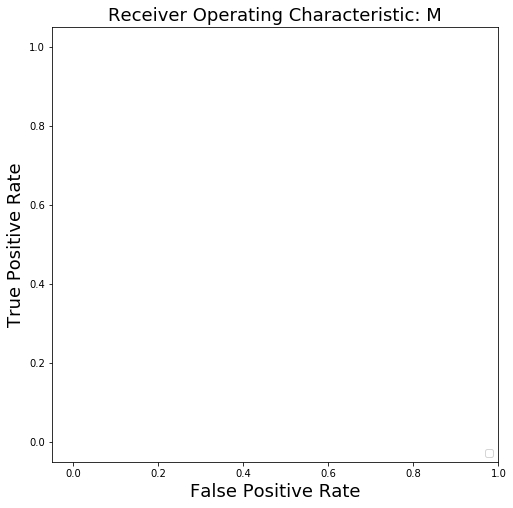

In [47]:
plt.figure(figsize=[8,8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [48]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



